In [45]:
import numpy as np
import matplotlib.pyplot as plt
from DatasetGenerator import generate_dataset
import torch
np.random.seed(42)

# Generate Example

In [46]:
seed=3
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
np.random.seed(seed)
print("Running on: " , device)

num_drones = 10
n_drone_clusters = 2
drone_cluster_split = np.random.uniform(0.0, 1.0, n_drone_clusters)
drone_cluster_split = drone_cluster_split / np.sum(drone_cluster_split)
num_facilities = 8
num_distinct_ends = 3
dim_ = 2
print(f"num_drones = {num_drones}\tnum_facilities = {num_facilities}\tdim = {dim_}")
# print(drone_cluster_split)
START_locs, F_base, END_locs = generate_dataset(
    num_drones, 
    n_drone_clusters, 
    drone_cluster_split, 
    num_facilities, 
    dim_, 
    device, 
    seed,
    drone_cluster_std_range=[0.02, 0.03], 
    F_noise_std=0.05,
    num_distinct_ends=num_distinct_ends
)

s = START_locs.cpu().numpy().reshape(-1,1,2)
e = END_locs.cpu().numpy().reshape(-1,1,2)
Y_init = F_base.detach().cpu().numpy()
n_algo_iters = 10

# plot_UAV_FLPO(START_locs, END_locs, F_base, (12,10))
# # plot_UAV_FLPO_3D(START_locs, END_locs, F_base)

Running on:  cpu
num_drones = 10	num_facilities = 8	dim = 2


In [5]:
# create a dataset of nodes and agents
# num_nodes = 10
# num_agents = 30
# dim = 2  # dimension of the space
# def generate_example(dim=2, num_nodes=30, num_agents=20):
#     nodes = 0.5 + 0.01 * np.random.randn(1, num_nodes, dim)  # centered at [0.5, 0.5] with small perturbation
#     s = np.random.rand(num_agents,1, dim)
#     e = np.random.rand(num_agents,1, dim)
#     return s, e, nodes
# s, e, Y_init = generate_example(num_nodes=num_facilities, num_agents=num_drones, dim=dim)

Text(0.5, 1.0, 'Nodes and Agents in 2D Space')

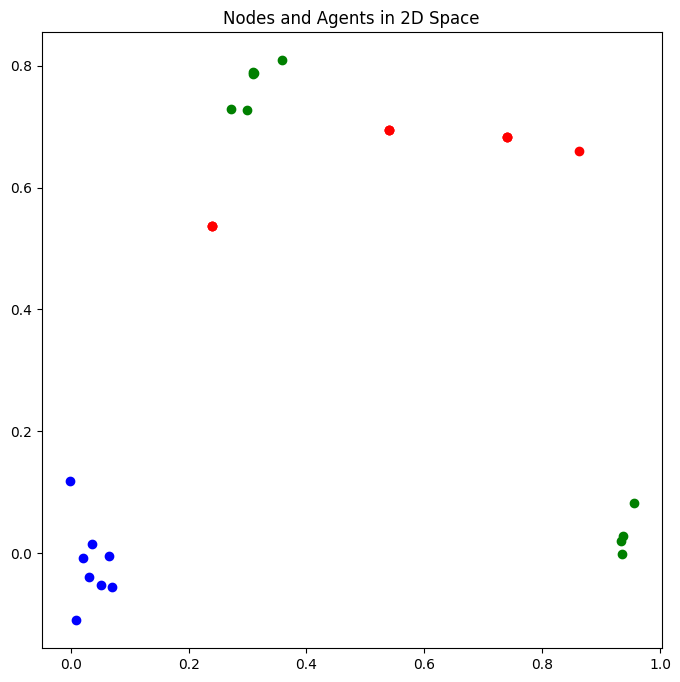

In [47]:

# plot the nodes and agents
plt.figure(figsize=(8, 8))
plt.scatter(Y_init[0, :, 0], Y_init[0, :, 1], c='blue', label='Nodes')
plt.scatter(s[:, 0, 0], s[:, 0, 1], c='green', label='Start Points')
plt.scatter(e[:, 0, 0], e[:, 0, 1], c='red', label='End Points')
plt.title('Nodes and Agents in 2D Space')

# PSO

Iter   0 | Best Cost: 9011.1764 | Mean Cost: 9839.5346
Iter 100 | Best Cost: 8005.9254 | Mean Cost: 8722.4274
Iter 200 | Best Cost: 8004.5184 | Mean Cost: 8179.7579
Iter 299 | Best Cost: 8004.2187 | Mean Cost: 8026.6492
Iter   0 | Best Cost: 9010.9542 | Mean Cost: 9857.8241
Iter 100 | Best Cost: 7009.4179 | Mean Cost: 8731.8102
Iter 200 | Best Cost: 6006.6436 | Mean Cost: 8022.9855
Iter 299 | Best Cost: 6005.0344 | Mean Cost: 6905.2392
Iter   0 | Best Cost: 9012.4512 | Mean Cost: 9856.2461
Iter 100 | Best Cost: 8007.0478 | Mean Cost: 8643.5774
Iter 200 | Best Cost: 8004.7675 | Mean Cost: 8158.8174
Iter 299 | Best Cost: 8003.8101 | Mean Cost: 8018.8888
Iter   0 | Best Cost: 8012.1563 | Mean Cost: 9790.2200
Iter 100 | Best Cost: 6011.4463 | Mean Cost: 7950.3241
Iter 200 | Best Cost: 5008.2497 | Mean Cost: 5898.9029
Iter 299 | Best Cost: 5005.7948 | Mean Cost: 5151.3730
Iter   0 | Best Cost: 9012.4755 | Mean Cost: 9830.3454
Iter 100 | Best Cost: 7012.1202 | Mean Cost: 8497.6603
Iter 200 |

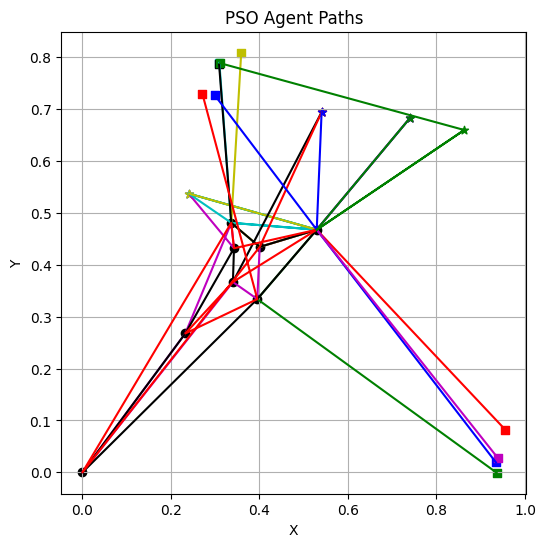

In [48]:
# run the PSO algorithm
from PSO import pso, pso_plot, pso_print

num_particles = 500
num_iters = 300
w = 0.9 # inertia weight
c1 = 0.5  # cognitive (individual) weight
c2 =1.5  # social (group) weight
t_pso_arr = []
c_pso_arr = []
for i in range(n_algo_iters):
    y_final, eta_final, global_best_cost, elapsed_time = pso(
        s,
        e,
        num_facilities,
        num_drones,
        dim_,
        Y_init=Y_init,
        verbose=True,
        w=w,
        c1=c1,
        c2=c2,
        num_particles=num_particles,
        num_iters=num_iters,
    )
    t_pso_arr.append(elapsed_time)
    c_pso_arr.append(global_best_cost)

t_pso_min = np.min(t_pso_arr)
c_pso_min = np.min(c_pso_arr)
pso_print(y_final, eta_final, global_best_cost, elapsed_time, s, e)
pso_plot(y_final, eta_final, s, e)

In [49]:
t_pso_min, c_pso_min

(64.94046378135681, 5004.041042508452)

# Genetic Algorithm

GA Solution:
Best Cost: 3.0401
Elapsed Time: 6.37s
Node positions (y):
  Node 0: [0.55309113 0.53386452]
  Node 1: [0.67211719 0.46524931]
  Node 2: [0.54739714 0.57367935]
  Node 3: [0.48581883 0.52315556]
  Node 4: [0.5146386  0.58082525]
  Node 5: [0.54626517 0.56969227]
  Node 6: [0.52844457 0.45452059]
  Node 7: [0.55810354 0.49627244]
Agent 0 path:
Node 7  -> Node 2  -> Node 5  -> Node 0  -> Node 6  -> Node 1  -> Node 7  -> Node 0  -> End
Agent 1 path:
Node 1  -> Node 7  -> Node 3  -> Node 3  -> Node 1  -> Node 1  -> Node 4  -> Node 6  -> End
Agent 2 path:
Node 1  -> Node 0  -> Node 5  -> Node 6  -> Node 3  -> Node 6  -> Node 0  -> Node 2  -> End
Agent 3 path:
Node 3  -> Node 5  -> Node 0  -> Node 0  -> Node 7  -> Node 5  -> Node 3  -> Node 7  -> End
Agent 4 path:
Node 4  -> Node 2  -> Node 2  -> Node 6  -> Node 0  -> Node 0  -> Node 0  -> Node 5  -> End
Agent 5 path:
Node 0  -> Node 0  -> Node 3  -> Node 2  -> Node 2  -> Node 7  -> Node 4  -> Node 0  -> End
Agent 6 path:
Node 5 

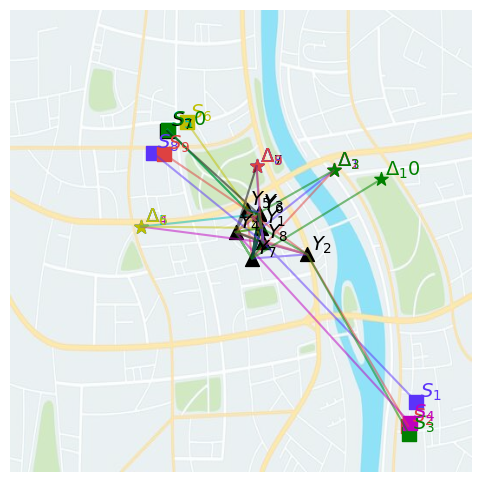

In [50]:
from GA import ga, ga_plot, ga_print
t_ga_arr = []
c_ga_arr = []
for i in range(n_algo_iters):
    best_y, best_eta, best_cost, elapsed_time = ga(
            s,
            e,
            num_facilities,
            num_drones,
            dim_,
            Y_init=None,
            verbose=False,
            pop_size=100,
            generations=100,
            mutation_rate=0.3,        
        )
    t_ga_arr.append(elapsed_time)
    c_ga_arr.append(best_cost)
t_ga_min = np.min(t_ga_arr)
c_ga_min = np.min(c_ga_arr)
ga_print(s, e, best_y, best_eta, best_cost, elapsed_time)
ga_plot(s, e, best_y, best_eta)

In [51]:
t_ga_min, c_ga_min

(6.356323957443237, 2.8367141453232296)

# SA

Final solution:
Node positions (y):
  Node 0: [0.48381854 0.66285951]
  Node 1: [0.53163141 0.61613703]
  Node 2: [0.39603495 0.57579325]
  Node 3: [0.53834077 0.48191491]
  Node 4: [0.57212206 0.48893008]
  Node 5: [0.43984307 0.54604272]
  Node 6: [0.43820674 0.72687952]
  Node 7: [0.43851204 0.60612547]
Agent paths (eta):
  Agent 0: Node 4 -> Node 4 -> Node 1 -> Node 4 -> Node 5 -> Node 7 -> Node 1 -> Node 3 -> End
  Agent 1: Node 3 -> Node 6 -> Node 4 -> Node 4 -> Node 0 -> Node 5 -> Node 4 -> Node 6 -> End
  Agent 2: Node 5 -> Node 3 -> Node 5 -> Node 3 -> Node 5 -> Node 0 -> Node 0 -> Node 0 -> End
  Agent 3: Node 0 -> Node 7 -> Node 7 -> Node 1 -> Node 4 -> Node 0 -> Node 6 -> Node 6 -> End
  Agent 4: Node 1 -> Node 1 -> Node 0 -> Node 1 -> Node 4 -> Node 3 -> Node 0 -> Node 6 -> End
  Agent 5: Node 7 -> Node 3 -> Node 1 -> Node 4 -> Node 3 -> Node 1 -> Node 7 -> Node 5 -> End
  Agent 6: Node 5 -> Node 0 -> Node 6 -> Node 4 -> Node 4 -> Node 5 -> Node 1 -> Node 6 -> End
  Agent 

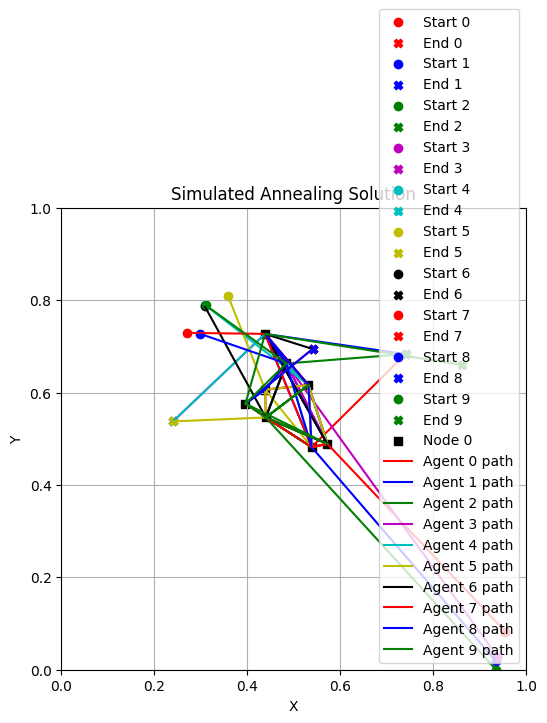

In [52]:
from SA import sa, plot_sa, print_sa
t_sa_arr = []
c_sa_arr = []
for i in range(n_algo_iters):
    best_y, best_eta, best_cost, elapsed_time = sa(
            s,
            e,
            num_facilities,
            num_drones,
            dim_,
            Y_init=Y_init,
            YMIN=0,
            YMAX=1.0,
            iters=1000,
            verbose=False,
        )
    t_sa_arr.append(elapsed_time)
    c_sa_arr.append(best_cost)
t_sa_min = np.min(t_sa_arr)
c_sa_min = np.min(c_sa_arr)
print_sa(s, e, best_y, best_eta)
plot_sa(s, e, best_y, best_eta)

In [53]:
t_sa_min, c_sa_min

(0.56752610206604, 3.871237659838234)

# CEM

CEM Solution:
Best Cost: 3.6647
Elapsed Time: 19.70 seconds
Node positions (y):
[[0.44554439 0.39759734]
 [0.43015256 0.35637974]
 [0.34836625 0.39058727]
 [0.34674    0.40106437]
 [0.35806801 0.38627667]
 [0.34972422 0.39614782]
 [0.36114471 0.43138239]
 [0.37224326 0.40343372]]
Agent paths (indices):
Agent 0: Node 1 -> Node 2 -> Node 4 -> Node 5 -> Node 5 -> Node 4 -> Node 4 -> Node 0 -> End
Agent 1: Node 1 -> Node 6 -> Node 3 -> Node 0 -> Node 5 -> Node 7 -> Node 5 -> Node 6 -> End
Agent 2: Node 1 -> Node 2 -> Node 2 -> Node 5 -> Node 5 -> Node 2 -> Node 7 -> End -> End
Agent 3: Node 0 -> Node 1 -> Node 7 -> Node 3 -> Node 5 -> Node 5 -> Node 5 -> Node 3 -> End
Agent 4: End -> End -> Node 6 -> Node 2 -> Node 7 -> Node 2 -> Node 7 -> Node 1 -> End
Agent 5: End -> Node 5 -> Node 3 -> Node 6 -> Node 7 -> Node 5 -> Node 1 -> Node 5 -> End
Agent 6: Node 5 -> Node 5 -> Node 3 -> Node 6 -> Node 3 -> Node 0 -> End -> End -> End
Agent 7: Node 5 -> Node 7 -> Node 3 -> Node 5 -> Node 7 -> Node

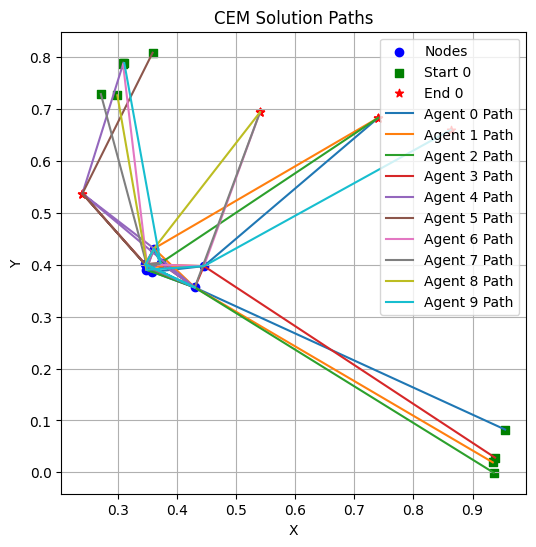

In [54]:
from CEM import cem, plot_cem, print_cem

t_cem_arr = []
c_cem_arr = []
for i in range(n_algo_iters):
    best_y, best_eta, best_cost, elapsed_time = cem(
            s,
            e,
            num_facilities,
            num_drones,
            dim_,
            Y_init=Y_init,
            YMIN=0,
            YMAX=1.0,
            n_iter=100,
            pop_size=100,
            elite_frac=0.2,
            verbose=False,
        )
    t_cem_arr.append(elapsed_time)
    c_cem_arr.append(best_cost)
t_cem_min = np.min(t_cem_arr)
c_cem_min = np.min(c_cem_arr)
print_cem(s, e, best_y, best_eta, best_cost, elapsed_time)
plot_cem(s, e, best_y, best_eta)

In [55]:
t_cem_min, c_cem_min

(19.610820770263672, 2.9136257855380947)

# ACO

Iter   0 | Best Cost: 10014.8759
Iter  50 | Best Cost: 9010.9403
Iter 100 | Best Cost: 8031.9519
Iter 150 | Best Cost: 8031.9519
Iter 199 | Best Cost: 8031.9519
Best Cost: 8031.9519, Time: 37.50s
Iter   0 | Best Cost: 9015.5800
Iter  50 | Best Cost: 9012.6170
Iter 100 | Best Cost: 8016.6199
Iter 150 | Best Cost: 8016.6199
Iter 199 | Best Cost: 8016.6199
Best Cost: 8016.6199, Time: 37.24s
Iter   0 | Best Cost: 9015.2104
Iter  50 | Best Cost: 8021.4103
Iter 100 | Best Cost: 8021.4103
Iter 150 | Best Cost: 8021.4103
Iter 199 | Best Cost: 8021.4103
Best Cost: 8021.4103, Time: 38.70s
Iter   0 | Best Cost: 9015.4446
Iter  50 | Best Cost: 9012.7359
Iter 100 | Best Cost: 9009.8875
Iter 150 | Best Cost: 9009.8875
Iter 199 | Best Cost: 9009.8875
Best Cost: 9009.8875, Time: 37.34s
Iter   0 | Best Cost: 9015.5455
Iter  50 | Best Cost: 9012.4364
Iter 100 | Best Cost: 8026.9193
Iter 150 | Best Cost: 8026.9193
Iter 199 | Best Cost: 8026.9193
Best Cost: 8026.9193, Time: 38.08s
Iter   0 | Best Cost: 90

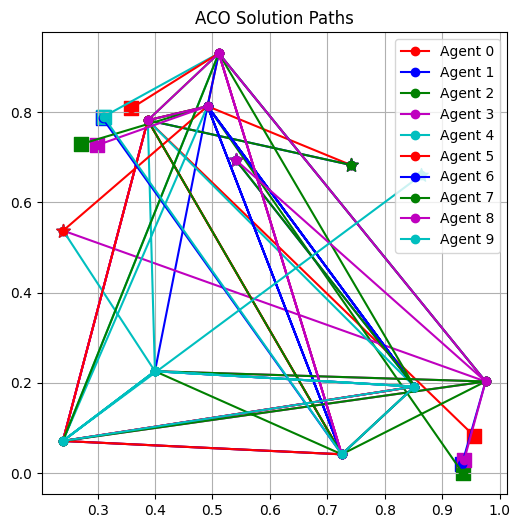

In [56]:
from ACO import aco, plot_aco, print_aco
t_aco_arr = []
c_aco_arr = []
for i in range(n_algo_iters):
    best_y, best_eta, best_cost, elapsed_time = aco(
        s,
        e,
        num_facilities,
        num_drones,
        dim_,
        Y_init=Y_init,
        YMIN=0.0,
        YMAX=1.0,
        num_iters=200,
        num_ants=100,
        alpha=1.0,
        beta=1.0,
        rho=0.5,
        Q=1.0,
        verbose=True,
    )
    t_aco_arr.append(elapsed_time)
    c_aco_arr.append(best_cost)
t_aco_min = np.min(t_aco_arr)
c_aco_min = np.min(c_aco_arr)
print_aco(s, e, num_facilities, num_drones, dim_, best_y, best_eta)
plot_aco(s, e, num_facilities, num_drones, dim_, best_y, best_eta)

In [57]:
t_aco_min, c_aco_min

(37.17118501663208, 8013.388354907365)

### Print the benchmark table for all the methods

In [58]:
print(f"---------------------------------------")
print(f"method \t\t time \t\t cost")
print(f"---------------------------------------")
print(f"PSO \t\t {t_pso_min:.2f} \t\t {c_pso_min:.3f}")
print(f"GA \t\t {t_ga_min:.2f} \t\t {c_ga_min:.3f}")
print(f"SA \t\t {t_sa_min:.2f} \t\t {c_sa_min:.3f}")
print(f"CEM \t\t {t_cem_min:.2f} \t\t {c_cem_min:.3f}")
print(f"ACO \t\t {t_aco_min:.2f} \t\t {c_aco_min:.3f}")
print(f"---------------------------------------")

---------------------------------------
method 		 time 		 cost
---------------------------------------
PSO 		 64.94 		 5004.041
GA 		 6.36 		 2.837
SA 		 0.57 		 3.871
CEM 		 19.61 		 2.914
ACO 		 37.17 		 8013.388
---------------------------------------


# Save benchmark data

In [59]:
import pickle

benchmark_data = {
    "START_locs":START_locs, 
    "F_base":F_base, 
    "END_locs":END_locs,
    "n_algo_iters":n_algo_iters,
    "t_pso_arr":t_pso_arr,
    "c_pso_arr":c_pso_arr,
    "t_ga_arr":t_ga_arr,
    "c_ga_arr":c_ga_arr,
    "t_sa_arr":t_sa_arr,
    "c_sa_arr":c_sa_arr,
    "t_cem_arr":t_cem_arr,
    "c_cem_arr":c_cem_arr,
    "t_aco_arr":t_aco_arr,
    "c_aco_arr":c_aco_arr,    
}

scenario = f"N{int(num_drones)}_M{int(num_facilities)}_ends{int(num_distinct_ends)}_seed{int(seed)}"
filepath = "benchmark_data/" + scenario
print(filepath)

with open(filepath, 'wb') as file:
    pickle.dump(benchmark_data, file)

benchmark_data/N10_M8_ends3_seed3
